# Week 03: Text Classification

This lab sheet is to practice the concepts taught this week so far: Naive Bayes classification and Sentiment Analysis.

**1. Assume the following likelihoods for each word being part of a positive or negative movie review and equal prior probabilities for each class.**

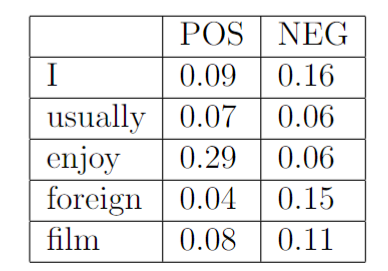

What class will a Naive Bayes classifier assign to the sentence “I usually enjoy foreign
film”? Show your workings.

In [53]:
p_d_pos = 0.09 * 0.07 * 0.29 * 0.04 * 0.08
p_d_neg = 0.16 * 0.06 * 0.06 * 0.15 * 0.11
print(p_d_pos, p_d_neg)
print(max(p_d_pos, p_d_neg))

5.8464e-06 9.503999999999999e-06
9.503999999999999e-06


In [54]:
# negative

**2. Given the following short feature-selected movie reviews each labelled with a genre either comedy or action:**
1. fun couple love love **comedy**
2. fast furious shoot **action**
3. couple fly fast fun fun **comedy**
4. furious shoot shoot fun **action**
5. fly fast shoot love **action**

And a new document D:

- fast couple shoot fly

Compute the most likely class for D. Assume a Naive Bayes classifier and **use add-1 smoothing.**


In [55]:
import re
import numpy as np
from collections import Counter, OrderedDict

documents = [
    "fun couple love love",
    "fast furious shoot",
    "couple fly fast fun fun",
    "furious shoot shoot fun",
    "fly fast shoot love",
]

class_per_document = ["comedy", "action", "comedy", "action", "action"]

classes = ["action", "comedy"]

corpus = " ".join(documents)
corpus = re.findall(r'[A-Za-z0-9|(<s>)|(</s>)]+', corpus)
vocabulary = Counter(corpus)
print(vocabulary)

vocab2index = OrderedDict([ (key, i) for i, key in enumerate(vocabulary.keys())])
vocab2index

index2vocab = OrderedDict([ (i, key) for i, key in enumerate(vocabulary.keys())])
index2vocab

big_doc_per_class = {}
for doc, class_ in zip(documents, class_per_document):
    doc = re.findall(r'[A-Za-z0-9|(<s>)|(</s>)]+', doc)
    if class_ not in big_doc_per_class:
        big_doc_per_class[class_] = [Counter(doc)]
    else:
        big_doc_per_class[class_].append(Counter(doc))

print(big_doc_per_class)

def count_big_doc(docs_class_, word = None):
    counter = 0
    if word:
        for doc in docs_class_:
            for word_in_doc, c in doc.items():
                if word == word_in_doc:
                    counter += c
    else:
        for doc in docs_class_:
            for word_in_doc, c in doc.items():
                counter += c

    return counter


priors_probabilities = [ len(big_doc_per_class[class_]) / len(class_per_document) for class_ in classes ]
print(priors_probabilities)


Counter({'fun': 4, 'shoot': 4, 'love': 3, 'fast': 3, 'couple': 2, 'furious': 2, 'fly': 2})
{'comedy': [Counter({'love': 2, 'fun': 1, 'couple': 1}), Counter({'fun': 2, 'couple': 1, 'fly': 1, 'fast': 1})], 'action': [Counter({'fast': 1, 'furious': 1, 'shoot': 1}), Counter({'shoot': 2, 'furious': 1, 'fun': 1}), Counter({'fly': 1, 'fast': 1, 'shoot': 1, 'love': 1})]}
[0.6, 0.4]


In [56]:
#### Testing some results
def display_likelihood(likelihoods):
    for i in range(len(vocabulary)):
        for j in range(len(classes)):
            word = index2vocab[i]
            print(f"P({word}|{classes[j]}) =",likelihoods[i,j], end="\t")
        print("")


In [57]:
likelihoods = np.zeros((len(vocabulary), len(classes)))

for i in range(len(vocabulary)):
    for j, class_ in enumerate(classes):
        likelihoods[i,j] = count_big_doc(big_doc_per_class[class_], index2vocab[i]) / count_big_doc(big_doc_per_class[class_])

print(likelihoods)
display_likelihood(likelihoods)

[[0.09090909 0.33333333]
 [0.         0.22222222]
 [0.09090909 0.22222222]
 [0.18181818 0.11111111]
 [0.18181818 0.        ]
 [0.36363636 0.        ]
 [0.09090909 0.11111111]]
P(fun|action) = 0.09090909090909091	P(fun|comedy) = 0.3333333333333333	
P(couple|action) = 0.0	P(couple|comedy) = 0.2222222222222222	
P(love|action) = 0.09090909090909091	P(love|comedy) = 0.2222222222222222	
P(fast|action) = 0.18181818181818182	P(fast|comedy) = 0.1111111111111111	
P(furious|action) = 0.18181818181818182	P(furious|comedy) = 0.0	
P(shoot|action) = 0.36363636363636365	P(shoot|comedy) = 0.0	
P(fly|action) = 0.09090909090909091	P(fly|comedy) = 0.1111111111111111	


In [59]:
# 1-smooth variant

likelihoods = np.zeros((len(vocabulary), len(classes)))

for i in range(len(vocabulary)):
    for j, class_ in enumerate(classes):
        numerator = count_big_doc(big_doc_per_class[class_], index2vocab[i]) + 1
        denominator = count_big_doc(big_doc_per_class[class_]) + len(vocabulary)
        likelihoods[i,j] =  numerator / denominator
print(likelihoods)
display_likelihood(likelihoods)

[[0.11111111 0.25      ]
 [0.05555556 0.1875    ]
 [0.11111111 0.1875    ]
 [0.16666667 0.125     ]
 [0.16666667 0.0625    ]
 [0.27777778 0.0625    ]
 [0.11111111 0.125     ]]
P(fun|action) = 0.1111111111111111	P(fun|comedy) = 0.25	
P(couple|action) = 0.05555555555555555	P(couple|comedy) = 0.1875	
P(love|action) = 0.1111111111111111	P(love|comedy) = 0.1875	
P(fast|action) = 0.16666666666666666	P(fast|comedy) = 0.125	
P(furious|action) = 0.16666666666666666	P(furious|comedy) = 0.0625	
P(shoot|action) = 0.2777777777777778	P(shoot|comedy) = 0.0625	
P(fly|action) = 0.1111111111111111	P(fly|comedy) = 0.125	


In [60]:
p_fun_comedy = 4 / 16
print(p_fun_comedy)
p_fun_action = 2 / 18
print(p_fun_action)

0.25
0.1111111111111111


In [62]:
# Testing in a sentence
test_doc = ["fast", "couple", "shoot", "fly"]

prob_given_class = []

for i in range(len(classes)):
    prob = priors_probabilities[i]
    for word in test_doc:
        idx_word = vocab2index[word]
        prob *= likelihoods[idx_word, i]
    
    prob_given_class.append(prob)

print(prob_given_class)

estimated_class = np.argmax(np.array(prob_given_class))

print(estimated_class,  classes[estimated_class])
        

[0.00017146776406035664, 7.324218750000001e-05]
0 action


**3. Why might a Naive Bayes classifier be used as a baseline classifier in sentiment analysis?**

It is because the characteristics of sentiment analysis. 
- The mainly point is that we don't necesarily need to account for dependencies between different words in a text. 
- By just looking if a word appears in a text, we can have a good estimation of what is the sentiment of the text.
- Other thing is because Naive Bayes works well in this task that is
    - Very Fast, low storage requirements
    - Work well with very small amounts of training data
    - Robust to Irrelevant Features

**4. Why is the ’Naive’ assumption made in Naive Bayes, and how does it affect sentiment
classification?**

The Naive assumption is that it considers each variable analyzed as independent to any other variable. In the sentiment classification, this variables are each word in a document (corpus or sentence), by considering them independent we are not taking into account long term dependencies that exits in text.